##### Import the Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Data Collection & Analysis

In [4]:
# loading the data from csv file to a Pandas DataFrame
df_kidney = pd.read_csv(r"C:\Multiple Disease prediction.Project\DataSet\kidney_disease - kidney_disease.csv")

In [5]:
# printing the first 5 rows of the dataframe
df_kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# number of rows and columns in the data frame
df_kidney.shape

(400, 26)

In [7]:
# getting more information about the dataset
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
 df_kidney.drop(['id'], axis=1, inplace=True)       # Drops the 'id' column from the dataframe

In [9]:
df_kidney['classification'] = df_kidney['classification'].replace(['ckd','notckd'], [1,0])

C:\Users\vinuv\AppData\Local\Temp\ipykernel_9928\2173534127.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kidney['classification'] = df_kidney['classification'].replace(['ckd','notckd'], [1,0])


In [10]:
# checking the missing values in each column
df_kidney.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
df_kid = df_kidney.dropna(axis=0)  # Drops all rows with any NaN values (axis=0 means rows)
print(f"Before dropping all NaN values: {df_kidney.shape}")  # Prints the shape of the dataset before dropping NaN values
print(f"After dropping all NaN values: {df_kid.shape}")  # Prints the shape of the dataset after dropping NaN values


Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)


In [12]:
# Resetting the index of df_kid to be a range starting from 0
df_kid.index = range(0,len(df_kid),1)
df_kid.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [13]:
# getting more information about the dataset
df_kid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [14]:
df_kid['pcv'] = df_kid['pcv'].astype('int64')  # Converts the 'pcv' column to integer type
df_kid['wc'] = df_kid['wc'].astype('int64')    # Converts the 'wc' column to integer type
df_kid['rc'] = df_kid['rc'].astype('float64')  # Converts the 'rc' column to float type
df_kid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int64  
 16  wc              158 non-null    int64  
 17  rc              158 non-null    flo

C:\Users\vinuv\AppData\Local\Temp\ipykernel_9928\1540618621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kid['pcv'] = df_kid['pcv'].astype('int64')  # Converts the 'pcv' column to integer type
C:\Users\vinuv\AppData\Local\Temp\ipykernel_9928\1540618621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kid['wc'] = df_kid['wc'].astype('int64')    # Converts the 'wc' column to integer type
C:\Users\vinuv\AppData\Local\Temp\ipykernel_9928\1540618621.py:3: SettingWithCopyWarning: 
A value is tryin

In [15]:
# getting some statistical measures about the data
df_kid.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772,0.272152
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,4.500000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,4.950000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,5.600000,1.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


##### Data Pre-Processing

##### Encoding the Gender Column

In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Loop through all columns in the dataframe and apply Ordinal Encoding
for col in df_kid.columns:
    df_kid[col] = encoder.fit_transform(df_kid[[col]])

# Now all columns in df_kid will be encoded


C:\Users\vinuv\AppData\Local\Temp\ipykernel_9928\3110302251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kid[col] = encoder.fit_transform(df_kid[[col]])
C:\Users\vinuv\AppData\Local\Temp\ipykernel_9928\3110302251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kid[col] = encoder.fit_transform(df_kid[[col]])
C:\Users\vinuv\AppData\Local\Temp\ipykernel_9928\3110302251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [19]:
df_kid.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,29.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,36.0,...,12.0,19.0,14.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,34.0,4.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,9.0,57.0,12.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,43.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,75.0,...,12.0,2.0,13.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3,47.0,3.0,1.0,3.0,2.0,1.0,0.0,1.0,1.0,56.0,...,1.0,54.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,41.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,58.0,...,5.0,40.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


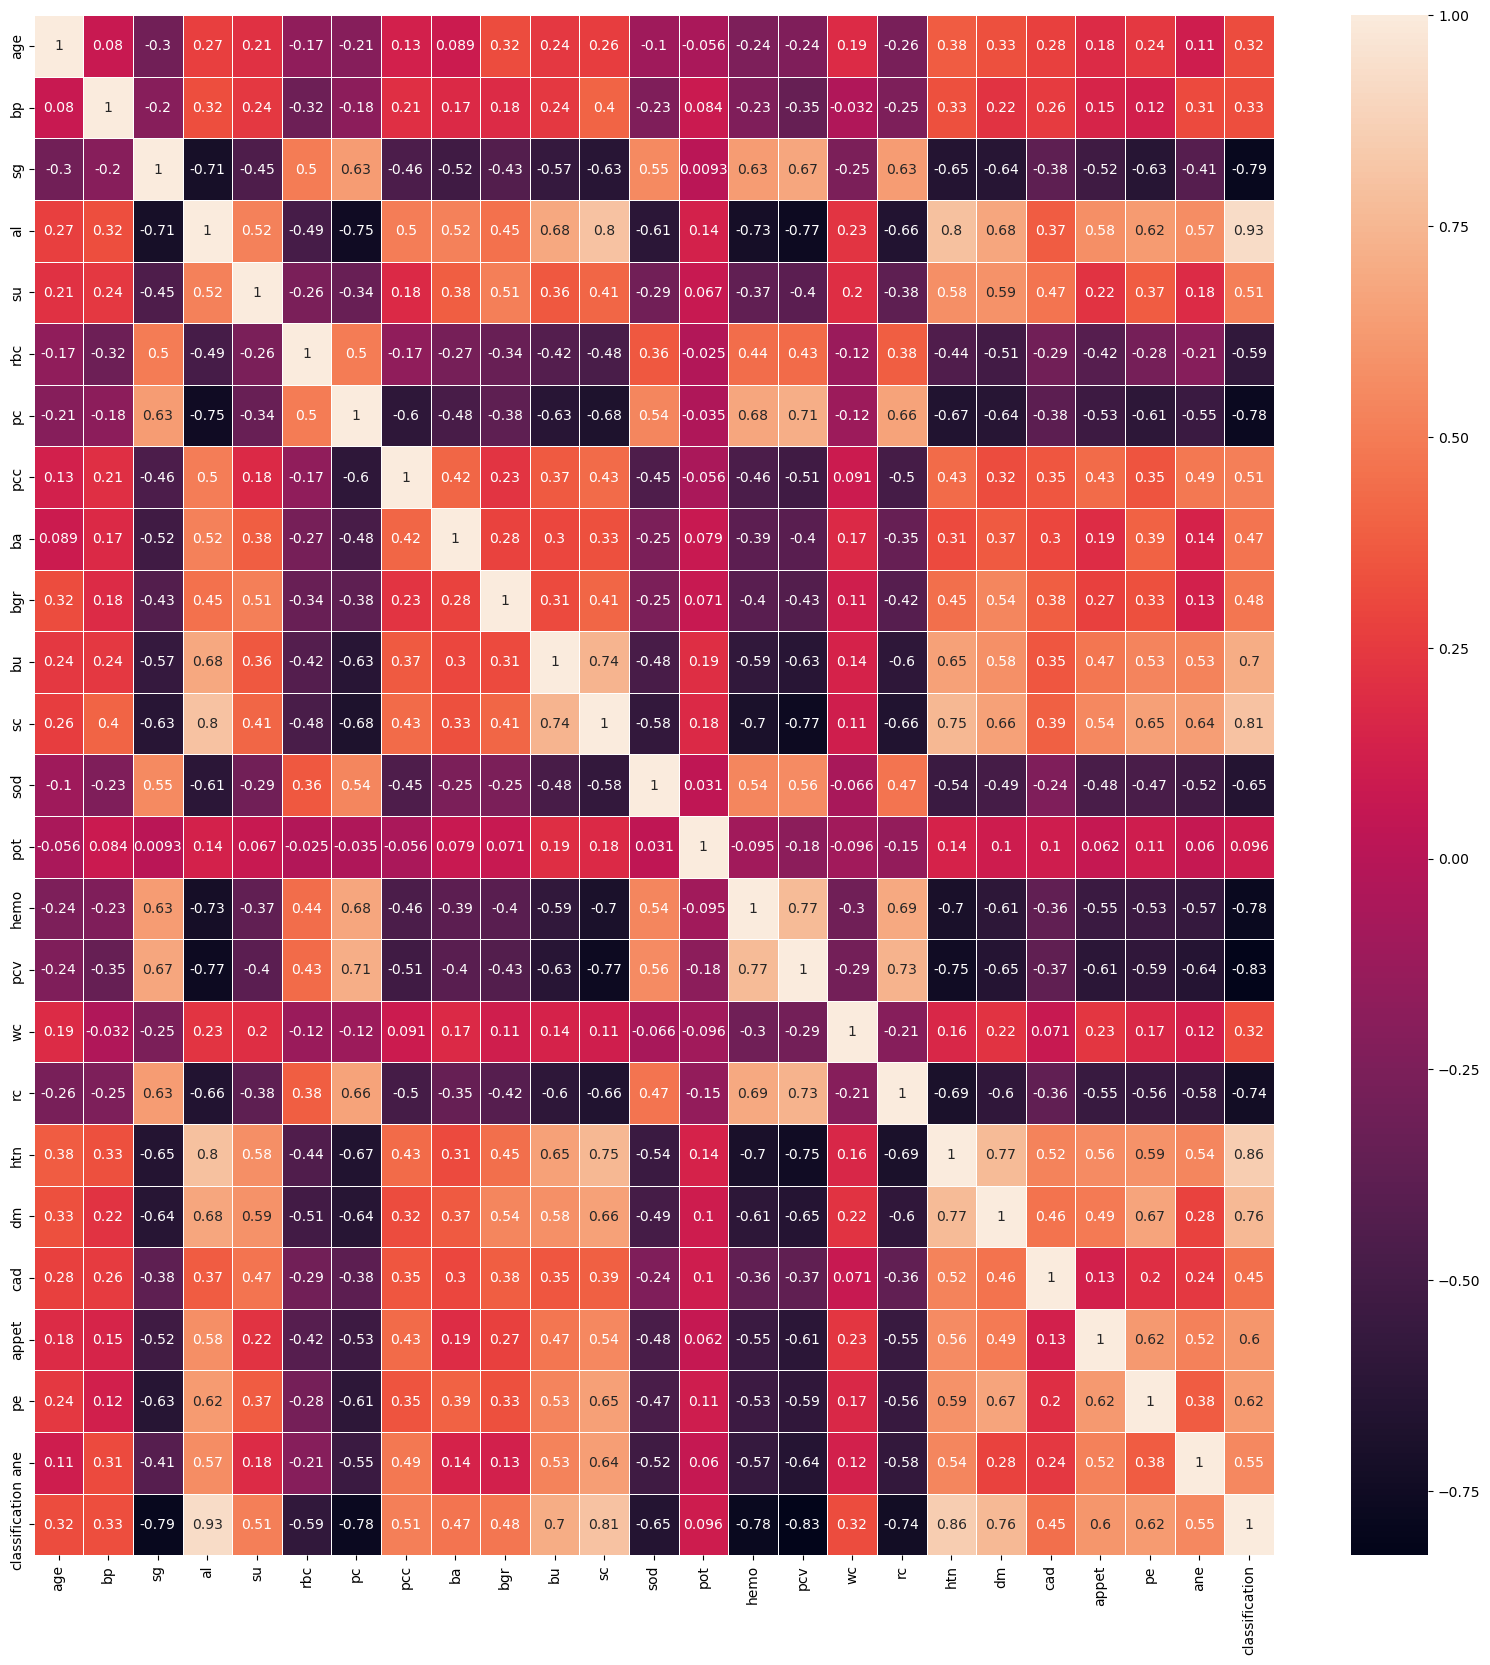

In [20]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(df_kid.corr(), annot=True, linewidths=0.5)

# Display the plot
plt.show()


##### Separating the features & Target

In [22]:
# X contains all columns except the target variable 'classification'
X = df_kid.drop(['classification'], axis=1)

# Y contains only the target variable 'classification'
Y = df_kid['classification']


In [23]:
print(X)  # This will print the first 5 rows of the feature variables


      age   bp   sg   al   su  rbc   pc  pcc   ba   bgr  ...  hemo   pcv  \
0    29.0  2.0  0.0  4.0  0.0  1.0  0.0  1.0  0.0  36.0  ...  25.0  12.0   
1    34.0  4.0  3.0  2.0  0.0  0.0  0.0  1.0  0.0   0.0  ...  14.0   9.0   
2    43.0  2.0  1.0  3.0  0.0  0.0  0.0  1.0  0.0  75.0  ...  22.0  12.0   
3    47.0  3.0  1.0  3.0  2.0  1.0  0.0  1.0  1.0  56.0  ...   1.0   1.0   
4    41.0  3.0  2.0  2.0  0.0  0.0  0.0  0.0  0.0  58.0  ...   4.0   5.0   
..    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
153  35.0  3.0  3.0  0.0  0.0  1.0  1.0  0.0  0.0  55.0  ...  58.0  26.0   
154  23.0  2.0  4.0  0.0  0.0  1.0  1.0  0.0  0.0   2.0  ...  66.0  33.0   
155   1.0  3.0  3.0  0.0  0.0  1.0  1.0  0.0  0.0  24.0  ...  59.0  28.0   
156   3.0  1.0  4.0  0.0  0.0  1.0  1.0  0.0  0.0  35.0  ...  43.0  30.0   
157  38.0  3.0  4.0  0.0  0.0  1.0  1.0  0.0  0.0  49.0  ...  59.0  32.0   

       wc    rc  htn   dm  cad  appet   pe  ane  
0    19.0  14.0  1.0  0.0  0.0    1.0

In [24]:
print(Y)  # This will print the first 5 rows of the feature variables



0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
153    0.0
154    0.0
155    0.0
156    0.0
157    0.0
Name: classification, Length: 158, dtype: float64


##### Splitting the data to training data & Test data

In [26]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=350)


In [27]:
print("Train Set: ", X_train.shape, Y_train.shape)
print("Test Set: ", X_test.shape, Y_test.shape)


Train Set:  (142, 24) (142,)
Test Set:  (16, 24) (16,)


##### Model Training

In [29]:
# Importing the LazyClassifier
from lazypredict.Supervised import LazyClassifier

# Creating an instance of the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fitting the classifier and getting the models and predictions
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)  # Using Y_train and Y_test (target variables)

# Display the results
print(models)


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 20.41it/s]

[LightGBM] [Info] Number of positive: 40, number of negative: 102
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.281690 -> initscore=-0.936093
[LightGBM] [Info] Start training from score -0.936093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = model.predict(X_test)  # Make predictions on the test data


##### Model Evaluation

##### Accuracy Score

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the model: {accuracy:.4f}")


Accuracy of the model: 0.9375


##### Saving the trained model

In [36]:
import pickle
pickle.dump(model, open('kidney.pkl', 'wb'))